In [1]:
%pwd

'/home/larry/tensorflow_prac'

In [2]:
import numpy as np
import tensorflow as tf
import utils

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:

batch_size = 128


In [6]:
# Step 1: Read in data
mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten=True)

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


### What do  we get ?

In [6]:
type(train)

tuple

In [6]:
len(train)

2

In [7]:
ary1=train[0]

In [8]:
ary1.ndim

2

In [9]:
ary1.shape

(55000, 784)

In [10]:
ary2=train[1]
print(ary2.ndim)
print(ary2.shape)

2
(55000, 10)


In [11]:
ary1[0,1]

0.0

In [14]:
(ary1[0,:]).ndim

1

In [10]:
type(train[0])

numpy.ndarray

2

In [11]:
type(train[1])

numpy.ndarray

In [14]:
train[0].shape

(55000, 784)

In [15]:
train[1].shape

(55000, 10)

### using tf.data.Dataset.from_tensor_slices
### Creates a Dataset whose elements are slices of the given tensors.

In [7]:
train_data = tf.data.Dataset.from_tensor_slices(train)
test_data = tf.data.Dataset.from_tensor_slices(test)

In [8]:
train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)

### using tf.data.Iterator.from_structure
### Creates a new, uninitialized Iterator with the given structure.
### The returned iterator is not bound to a particular dataset, and it has no initializer. To initialize the iterator, run the operation returned by Iterator.make_initializer(dataset).

In [9]:
print(test_data.output_types)
print(test_data.output_shapes)

(tf.float32, tf.float64)
(TensorShape([Dimension(None), Dimension(784)]), TensorShape([Dimension(None), Dimension(10)]))


In [10]:
print(train_data.output_types)
print(train_data.output_shapes)

(tf.float32, tf.float64)
(TensorShape([Dimension(None), Dimension(784)]), TensorShape([Dimension(None), Dimension(10)]))


In [11]:
iterator = tf.data.Iterator.from_structure(train_data.output_types,
                                           train_data.output_shapes)

In [12]:
train_init = iterator.make_initializer(train_data)
test_init = iterator.make_initializer(test_data)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
img, label = iterator.get_next()

###   Let's build the graph:           logits = img * w +b 

In [14]:
w = tf.get_variable(name='weights', shape=(784, 10), initializer=tf.random_normal_initializer(0, 0.01))
b = tf.get_variable(name='bias', shape=(1, 10), initializer=tf.random_normal_initializer(0, 0.01) )
logits = tf.matmul(img, w)+b

In [15]:
with tf.Session() as sess:
    sess.run(train_init)    # drawing samples from train_data
    sess.run(tf.global_variables_initializer())
    t1=sess.run([img,label,w,b,logits])

In [16]:
print(type(t1))
print(len(t1))

<class 'list'>
5


### logits

In [17]:
print(t1[4].shape)

(128, 10)


### first row of the logits

In [18]:
print(t1[4][0])

[ 0.19991681  0.11439122 -0.05696998 -0.21145293  0.11529613  0.10617366
 -0.0401352  -0.23249067  0.05119051 -0.02021443]


###  bias, b

In [19]:
print(t1[3].shape)

(1, 10)


In [20]:
print(t1[3])

[[-0.00077676  0.00753353 -0.00140817 -0.01136574 -0.00057079  0.00412028
  -0.00917039  0.01549204 -0.00542596  0.0085222 ]]


### image :   one batch is 128 image , each image has 28x28=784 pixel

In [21]:
print(t1[0].shape)

(128, 784)


### first image

In [22]:
print(t1[0][0].shape)

(784,)


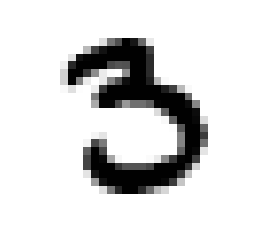

In [23]:
pic=t1[0][0]
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

### weight w. 

In [24]:
print(t1[2].shape)

(784, 10)


### image x weight

In [25]:
y=np.matmul(t1[0],t1[2])
print(y.shape)
print(y[0])

(128, 10)
[ 0.20069358  0.10685769 -0.05556182 -0.2000872   0.11586695  0.10205341
 -0.03096482 -0.24798274  0.05661647 -0.02873662]


In [26]:
print(t1[3])

[[-0.00077676  0.00753353 -0.00140817 -0.01136574 -0.00057079  0.00412028
  -0.00917039  0.01549204 -0.00542596  0.0085222 ]]


In [27]:
0.20069358-0.00077676 

0.19991682000000002

In [28]:
print(t1[4][0])

[ 0.19991681  0.11439122 -0.05696998 -0.21145293  0.11529613  0.10617366
 -0.0401352  -0.23249067  0.05119051 -0.02021443]


###  How about calling sess.run twice ?
#### (1) Can we get one batch after calling sess.run([img, label]) ? 
#### (2) What is the batch data after   calling sess.run([img, label]) ? 

In [29]:
with tf.Session() as sess:
    sess.run(train_init)    # drawing samples from train_data
    sess.run(tf.global_variables_initializer())
    t1=sess.run([img,label,w,b,logits])
    t1=sess.run([img,label,w,b,logits])

In [30]:
print(t1[0][0].shape)

(784,)


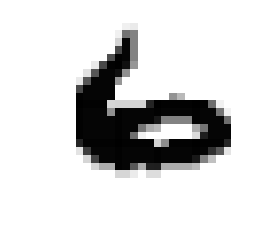

In [31]:
pic=t1[0][0]
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()